## Задание: Центральная предельная теорема своими руками

В качестве непрерывного распределения возьмем экспонентциальное распределение с параметром лямбда равным 0.2:
<br>[Описание можно найти здесь](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

<br>Функция плотности распределения будет f(x) = 0.2 * exp(-0.2x)
<br>Матемитичесое ожидание равно 5 (лямбда в степени -1)
<br>Дисперсия равна 25 (лямбда в степени -2)

Гистограмма выборки из 1000 значений и график функции плотности вероятности на [0,50]


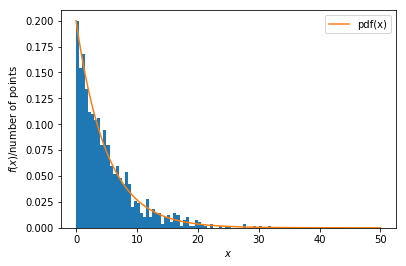

In [37]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

#Графики будем строить на интервале [0, 50] тк как будет видно плотность распределения быстро стремится 0
print 'Гистограмма выборки из 1000 значений и график функции плотности вероятности на [0,50]'
l = 0.2 #лямбда
m = 5 #матемитичесое ожидание
d = 25 #дисперсия

expon = stats.expon(0, 1/l)  #задаем распределение котрое будем использовать далее
samples = expon.rvs(size=1000) #слчайная выборка 1000 значений  
plt.hist(samples, bins=100, range=(0,50), density='True') #печатаем гисотрамму
plt.ylabel('$f(x)$/number of points')
plt.xlabel('$x$')

#печатем функцию распределения на [0,50]
x = np.linspace(0,50,100)
pdf = expon.pdf(x)
plt.plot(x, pdf, label='pdf(x)')
plt.legend(loc='best')
plt.show()

In [31]:
# Определим фкнции необходимые для подсчета среднего а так же печати гистотраммы и нормального распределения которым, 
# согласно центральной предельной теореме, приближается распределение выборочных средних

# Возвращает лист средних данных из 1000 выборок размера n
def get_everage_samples(n):
    data=[]
    for i in range(1000):
        data.append(sum(expon.rvs(size=n))/n)
    return data

# Печатает гистограмму для средних выборки размера N а так же соответсвтующую функцию плотности нормального распределения
def plot_hist(n):
    print 'N =', n,' Number of samples: 1000'
    data = get_everage_samples(n) # получить лист средних данных из 1000 выборок размера n
    plt.hist(data, bins=100, range=(0,50), density='True')
    plt.ylabel('$f(x)$/number of points')
    plt.xlabel('$x$')

    # дисперия нормального распределения определяется как дисперсия исходного распределения поделеная на размер выборки
    # но так же нужно найти параметр scale который равен квадратному корню из дисперсии
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
    D=d/float(n)    
    scale=math.sqrt(D)
    norm = stats.norm(m, scale)
    plt.plot(x, norm.pdf(x), label='pdf(x)')
    plt.show()

N = 5  Number of samples: 1000


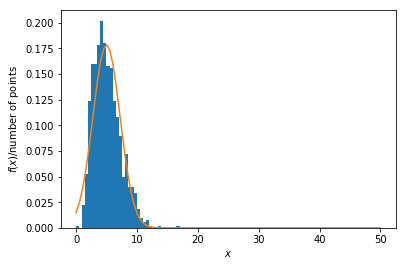

In [32]:
#n=5 
plot_hist(5)

N = 10  Number of samples: 1000


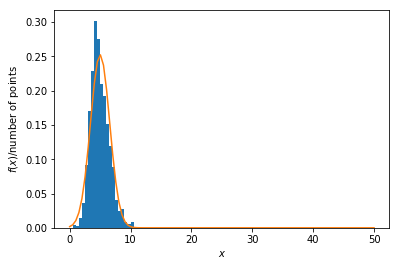

In [33]:
#n=10 
plot_hist(10)

N = 50  Number of samples: 1000


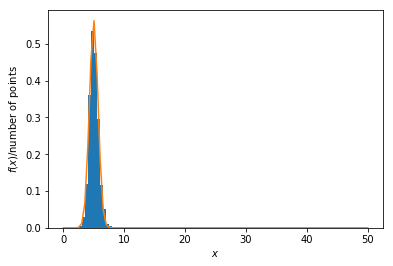

In [35]:
#n=50 
plot_hist(50)

N = 200  Number of samples: 1000


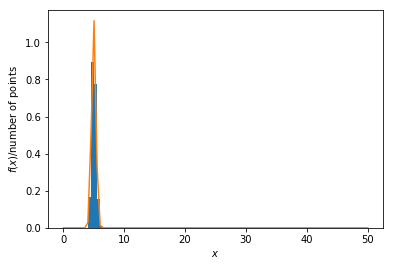

In [36]:
n=200
plot_hist(200)

#### Выводы:
приближение распределения выборочных средних с помощью нормального распределения улучшаешься при увеличении числа N